# Documentation about RGB and ANSI colour code


- [WIKI ANSI](https://en.wikipedia.org/wiki/ANSI_escape_code)
- [Python_package](https://pypi.python.org/pypi/ansicolors)
- [WIKI_Term](https://en.wikipedia.org/wiki/Terminal_capabilities)

Execute in a term: 
```bash
echo -e (cat test_pika.txt ) 
```

In [1]:
from ansi.colour import rgb
from PIL import Image
import numpy as np

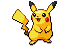

In [2]:
my_pikachu = "Poke/col1_25.png"
my_img = Image.open(my_pikachu)
my_img

In [3]:
DATA = my_img.getdata()
(s1, s2) = my_img.size
print(s1, s2)

80 46


----------------

### Transform image array to bash color

In [4]:
transformed = np.array(list(DATA)).reshape((s2,s1,4))

In [5]:
s1, s2    = transformed.shape[:2]
color_mat = np.zeros((s1, s2)).astype(str)

for idx, i in enumerate(transformed):
    r = np.array([-1,-1,-1,-1])
    
    for jdx, j in enumerate(i):
        if (j == np.array(r)).all() :
            color_mat[idx][jdx] = ""
        else :
            color_mat[idx][jdx] = rgb.rgb256(j[0], j[1], j[2])
            r = j # remember the previous state
            

In [6]:
# remove background when alpha = 0
A,B = np.where(transformed[:,:,3] == 0) 
for a,b in zip(A,B):
    if color_mat[a][b] != '':
        color_mat[a][b] = '\x1b[49m'
        


In [7]:
my_str = ""
for row in color_mat:
    my_str += '  '.join(row).replace("\x1b", '\e') + '\\n'

# 38 is the code for text... 48 for background !!
my_str = my_str.replace('[38;', "[48;")

In [8]:
with open("test_pika.txt", 'w') as fp:
    fp.write(my_str)